# Random Forest
(Bagging = Bootstrap Aggregating)

Bootstrapping: Aleatoriezar la entrada de datos. Paa cada árbol de decisión (DT) un "nuevo dataset" es formado del original. Los datos son elegidas desde las columnas con muestreo aleatorio con reemplazo.
Aggregating: cada árbol posee un "voto", la predicción se hace votando .

In [46]:
# Importando dependencias
import matplotlib.pyplot as plt
%matplotlib inline

from time import time
from pandas import read_csv
from numpy import arange

## Pre-processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

## Tree display
from sklearn.tree import plot_tree

## Cross-Validation
from sklearn.model_selection import StratifiedShuffleSplit

## Search
from sklearn.model_selection import GridSearchCV

## Metrics
from sklearn.metrics import classification_report, plot_confusion_matrix

### Data loading

Source: [Breast Cancer Coimbra](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra)

In [47]:
# cargar datos
data = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')
feature_names = data.columns[:-1]

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


### Data pre-processing

In [49]:
#para repetibilidad 
seed= 20220824
## Predictors and target assignment
X = data.drop(columns=['Classification'])
y = data['Classification']

## Partition sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)


## Display data shape
print('(train shape) X: {}, y: {}'.format(X_train.shape, y_train.shape))
print('(test shape) X: {}, y: {}'.format(X_test.shape, y_test.shape))

(train shape) X: (87, 9), y: (87,)
(test shape) X: (29, 9), y: (29,)


In [50]:
#import warnings
#warnings.filterwarnings('ignore')

start = time()

## Cross-Validation's method instance
cvs = StratifiedShuffleSplit(n_splits=5, train_size=0.7)

## Parameter-space for searching
param ={'min_samples_split': arange(1, 25),
        'max_depth': arange(1, 10)
       }

## Best model estimation by gridsearchcv
GS = GridSearchCV(estimator=RandomForestClassifier(criterion='entropy', n_estimators=50), 
                  cv=cvs, n_jobs=-1, 
                  param_grid=param,
                  scoring='roc_auc').fit(X=X_train, y=y_train)

## Display best model's hyperparameters
print('Best hyperparameters: {}'.format(GS.best_params_))

timeUp = time()-start
print('Time spent: {:.2f} seconds'.format(timeUp))

Best hyperparameters: {'max_depth': 3, 'min_samples_split': 11}
Time spent: 72.90 seconds


In [51]:
## Compute score
GS.score(X_test, y_test)

0.8080808080808081

In [10]:
def plot_feature_importances(model, features, width=10, height=6):
    """
        DESCRIPTION:
            Feature importance display function
        
        INPUT:
            @param model: Decision tree regression model
            @type model: sklearn.DecisionTreeRegressor
            
            @param features: feature names
            @type features: list
            
            @param width: width of the display space (default 10)
            @type width: int
            
            @param height: height of the display space (default 8)
            @type height: int
        
        OUTPUT:
            A graphic of feature importance
    """
    
    ## Number of features
    n_features = len(features)
    
    ## Feature importance display
    plt.figure(figsize=(width, height))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

gini (Train): 0.8966
gini (Test): 0.7241


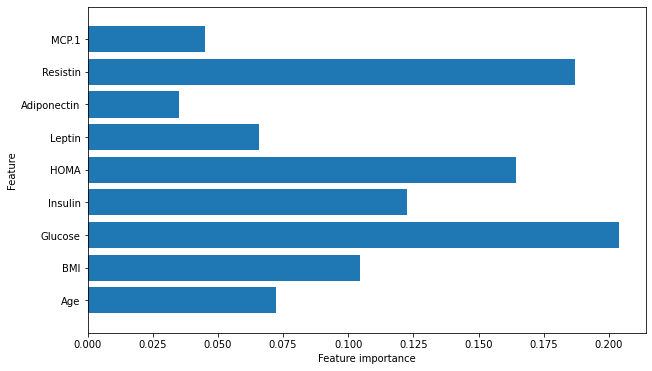

In [52]:
## Fitting a model with best parameters
model = RandomForestClassifier(**GS.best_params_).fit(X=X_train, y=y_train)

## Compute score using train set
print('{} (Train): {:.4f}'.format(model.criterion, model.score(X=X_train, y=y_train)))

## Compute score using test set
print('{} (Test): {:.4f}'.format(model.criterion, model.score(X=X_test, y=y_test)))

## feature importances display
plot_feature_importances(model, feature_names)

              precision    recall  f1-score   support

           1       0.64      0.64      0.64        11
           2       0.78      0.78      0.78        18

    accuracy                           0.72        29
   macro avg       0.71      0.71      0.71        29
weighted avg       0.72      0.72      0.72        29



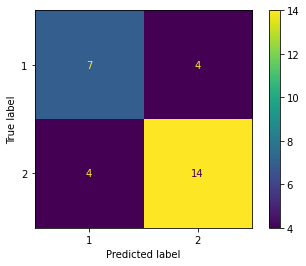

In [53]:
## compute prediction
prediction = model.predict(X_test)

## display classification report
print(classification_report(y_pred=prediction, y_true=y_test))

## Display confusion matrix
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test);

### Ada Boost Classifier

In [14]:
## Cross-Validation's method instance
cvs = StratifiedShuffleSplit(n_splits=5, train_size=0.7)

## Parameter-space for searching
param ={'n_estimators': arange(25, 100, 5),
        'learning_rate': arange(0.1, 1.1, 0.1)
       }

## Best model estimation by gridsearchcv
GS = GridSearchCV(estimator=AdaBoostClassifier(), 
                  cv=cvs, n_jobs=-1, 
                  param_grid=param,
                  scoring='roc_auc').fit(X=X_train, y=y_train)

## Display best model's hyperparameters
print('Best hyperparameters: {}'.format(GS.best_params_))

timeUp = time()-start
print('Time spent: {:.2f} seconds'.format(timeUp))

Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 65}
Time spent: 669.39 seconds


In [15]:
## Compute score
GS.score(X_test, y_test)

0.8207070707070708

(Train): 0.9080
(Test): 0.7931


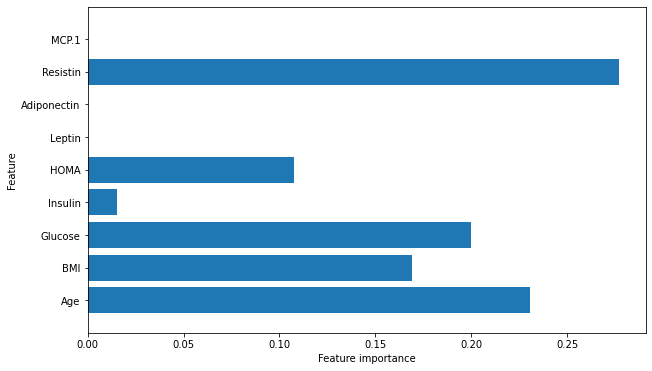

In [16]:
## Fitting a model with best parameters
model = AdaBoostClassifier(**GS.best_params_).fit(X=X_train, y=y_train)

## Compute score using train set
print('(Train): {:.4f}'.format(model.score(X=X_train, y=y_train)))

## Compute score using test set
print('(Test): {:.4f}'.format(model.score(X=X_test, y=y_test)))

## feature importances display
plot_feature_importances(model, feature_names)

              precision    recall  f1-score   support

           1       0.86      0.55      0.67        11
           2       0.77      0.94      0.85        18

    accuracy                           0.79        29
   macro avg       0.81      0.74      0.76        29
weighted avg       0.80      0.79      0.78        29



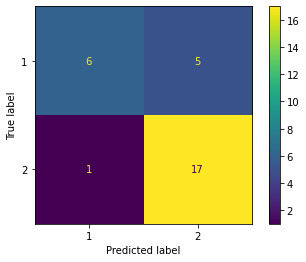

In [17]:
## compute prediction
prediction = model.predict(X_test)

## display classification report
print(classification_report(y_pred=prediction, y_true=y_test))

## Display confusion matrix
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test);

### Gradient Boosting Machine

In [18]:
### Gradient Boosting Machine
start = time()

## Cross-Validation's method instance
cvs = StratifiedShuffleSplit(n_splits=5, train_size=0.7)

## Parameter-space for searching
param ={'n_estimators': arange(25, 200, 25),
        'learning_rate': arange(0.1, 1.1, 0.1),
        'subsample': [0.5, 0.75, 1.0], 
        'max_depth': arange(1,5)
       }

## Best model estimation by gridsearchcv
GS = GridSearchCV(estimator=GradientBoostingClassifier(), 
                  cv=cvs, n_jobs=-1, 
                  param_grid=param,
                  scoring='roc_auc').fit(X=X_train, y=y_train)

## Display best model's hyperparameters
print('Best hyperparameters: {}'.format(GS.best_params_))

timeUp = time()-start
print('Time spent: {:.2f} seconds'.format(timeUp))

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50, 'subsample': 0.75}
Time spent: 197.77 seconds


In [19]:
## Compute score
GS.score(X_test, y_test)

0.8282828282828283

(Train): 1.0000
(Test): 0.7586


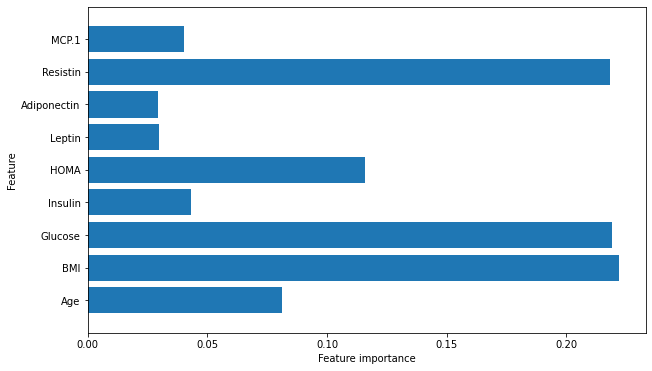

In [20]:
## Fitting a model with best parameters
model = GradientBoostingClassifier(**GS.best_params_).fit(X=X_train, y=y_train)

## Compute score using train set
print('(Train): {:.4f}'.format(model.score(X=X_train, y=y_train)))

## Compute score using test set
print('(Test): {:.4f}'.format(model.score(X=X_test, y=y_test)))

## feature importances display
plot_feature_importances(model, feature_names)

## Extreme Gradient Boosting Machine 
  - Version 0.90

Another example: https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn/notebook

Hyperparameters' list:
https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

In [21]:
start = time()

## Cross-Validation's method instance
cvs = StratifiedShuffleSplit(n_splits=5, train_size=0.7)

## Parameter-space for searching
param ={'n_estimators': arange(25, 200, 25),
        'learning_rate': arange(0.1, 1.1, 0.1),
        'subsample': [0.5, 0.75, 1.0], 
        'max_depth': arange(1,5)
       }

## Best model estimation by gridsearchcv
GS = GridSearchCV(estimator=xgb.XGBClassifier(), 
                  cv=cvs, n_jobs=-1, 
                  param_grid=param,
                  scoring='roc_auc', refit=True,
                  ).fit(X=X_train, y=y_train)

## Display best model's hyperparameters
print('Best hyperparameters: {}'.format(GS.best_params_))

timeUp = time()-start
print('Time spent: {:.2f} seconds'.format(timeUp))

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 1.0}
Time spent: 53.56 seconds


              precision    recall  f1-score   support

           1       0.70      0.64      0.67        11
           2       0.79      0.83      0.81        18

    accuracy                           0.76        29
   macro avg       0.74      0.73      0.74        29
weighted avg       0.76      0.76      0.76        29



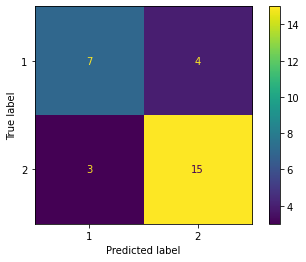

In [22]:
## compute prediction
prediction = model.predict(X_test)

## display classification report
print(classification_report(y_pred=prediction, y_true=y_test))

## Display confusion matrix
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test);

In [23]:

#para trabajar con modelos como regresión lineal
## Estandarizamos los datos
scale = StandardScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

### Aplicación de metodos de Cross-Validation

In [54]:
from numpy import linspace, argmin
from scipy.stats import uniform
## Modelos
from sklearn.linear_model import LogisticRegression
## Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut, RepeatedKFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit

## Metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve

## Instancias de los metodos de Cross-validation
CVs = {'KFold': KFold(n_splits=5, shuffle=True, random_state=0), 
       'LeaveOneOut': LeaveOneOut(),
       'RepeatedKFold': RepeatedKFold(n_splits=5, n_repeats=2, random_state=0),
       'ShuffleSplit': ShuffleSplit(n_splits=5, train_size=0.7, random_state=0), 
       'StratifiedKFold': StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
       'StratifiedShuffleSplit': StratifiedShuffleSplit(n_splits=5, train_size=0.7, random_state=0)
      }

In [55]:
## Instancia del modelo
model = LogisticRegression()

## Computamos los scores con cada metodo de Cross-validation
for name in CVs.keys():
    
    ## Computo de los scores
    scores = cross_val_score(estimator=model, X=X_train, y=y_train, 
                             n_jobs=-1, cv=CVs[name])
    
    ## Imprimir la media y varianza de los scores
    print('CV: {:>23s}, Mean Scores: {:.4f}, Variance Scores:{:.4f}'.format(name, 
                                                                            scores.mean(), 
                                                                            scores.var()))

CV:                   KFold, Mean Scores: 0.6686, Variance Scores:0.0056
CV:             LeaveOneOut, Mean Scores: 0.7126, Variance Scores:0.2048
CV:           RepeatedKFold, Mean Scores: 0.6853, Variance Scores:0.0051
CV:            ShuffleSplit, Mean Scores: 0.6074, Variance Scores:0.0009
CV:         StratifiedKFold, Mean Scores: 0.7242, Variance Scores:0.0100
CV:  StratifiedShuffleSplit, Mean Scores: 0.7407, Variance Scores:0.0082


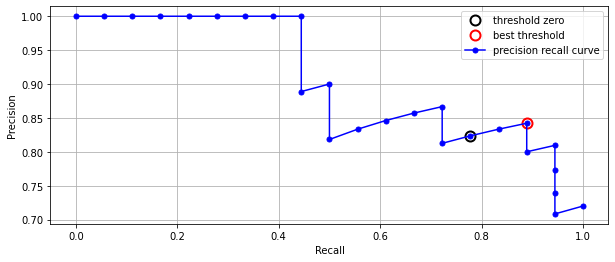

In [34]:
## Ajuste del modelo con train data
model.fit(X=X_train, y=y_train)

## Computo de precision, recall y threshold (Solo para Binary Class)
precision, recall, thresholds = precision_recall_curve(y_true=y_test-1,
                                                       probas_pred=model.decision_function(X_test))

## Find threshold closest to zero
close_zero = argmin(abs(thresholds))

## Find best threshold closest to upper-right corner, i.e (1,1)-coordenate
(x,y) = (1,1)

distance = []
for a, b in zip(precision, recall):
    distance.append( ((x-a)**2 + (y-b)**2)**(0.5) )
best = argmin(distance)

## Display Precision-Recall curve
plt.figure(figsize=(10, 4))
plt.plot(recall[close_zero], precision[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(recall[best], precision[best], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='r', mew=2)

plt.plot(recall, precision, 'bo-', label="precision recall curve", markersize=5)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.legend(loc="best")
plt.grid()
plt.show()

### GridSearch + Cross Validation

In [35]:
## Espacio de parametros
param = {'C': linspace(0.001, 10, 100)}

## Instancia del metodo Cross-Validation
cvs = StratifiedShuffleSplit(n_splits=10, train_size=0.7, random_state=0)

## Instancia del modelo
model = LogisticRegression(n_jobs=-1, solver='newton-cg', max_iter=10000)

## Instancia y ajuste del grid search
gs = GridSearchCV(estimator=model, param_grid=param, n_jobs=-1).fit(X=X_train, y=y_train)

## Imprimir el mejor C encontrado y el score asociado
print('El mejor C encontrado es: {:.4f}. Score: {:.4f}'.format(gs.best_params_['C'], 
                                                               gs.best_score_))

El mejor C encontrado es: 0.2030. Score: 0.7039


In [36]:
## Imprimir el mejor modelo
gs.best_estimator_

LogisticRegression(C=0.203, max_iter=10000, n_jobs=-1, solver='newton-cg')

In [37]:
## Evaluamos el score en el test data en el mejor modelo
gs.score(X=X_test, y=y_test)

0.7241379310344828

### RandomSearch + Cross Validation

In [39]:
from sklearn.model_selection import RandomizedSearchCV
## Espacio de parametros
param = {'C': uniform(0,100)}

## Instancia del metodo Cross-Validation
cvs = StratifiedShuffleSplit(n_splits=15, train_size=0.7, random_state=0)

## Instancia del modelo
model = LogisticRegression(n_jobs=-1, solver='newton-cg', max_iter=10000)

## Instancia y ajuste del random search
gs = RandomizedSearchCV(estimator=model, 
                        param_distributions=param, 
                        n_jobs=-1, n_iter=100).fit(X=X_train, y=y_train)

## Imprimir el mejor C encontrado y el score asociado
print('El mejor C encontrado es: {:.4f}. Score: {:.4f}'.format(gs.best_params_['C'], 
                                                               gs.best_score_))

El mejor C encontrado es: 1.2314. Score: 0.7033


In [40]:
## Imprimir el mejor modelo
gs.best_estimator_

LogisticRegression(C=1.2314496206854986, max_iter=10000, n_jobs=-1,
                   solver='newton-cg')

In [41]:
gs.score(X=X_test, y=y_test)

0.7241379310344828